# Project 6

# My Website Stuff!  

My Blog:  
https://secure-bayou-76149.herokuapp.com/site/blog/all/

My Report:  
https://secure-bayou-76149.herokuapp.com/site/project6/report/

# Import all the things!

In [1404]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from imdbpie import Imdb
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from sklearn.feature_selection import SelectKBest, chi2
from IPython.display import Image  
import pydotplus 
import os
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline

# Import the data and look at it

In [848]:
# Importing dataset that was previously scraped and cleaned
df = pd.read_csv('imdb.csv', sep='\t')

In [849]:
df.head()

,Unnamed: 0,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,...,wrong,wwii,year,year old,years,york,young,young boy,young man,young woman
0,0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80.000000,Two imprisoned men bond over a number of years...,https://images-na.ssl-images-amazon.com/images...,...,0,0,0,0,1,0,0,0,0,0
1,1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100.000000,The aging patriarch of an organized crime dyna...,https://images-na.ssl-images-amazon.com/images...,...,0,0,0,0,0,0,0,0,0,0
2,2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80.000000,The early life and career of Vito Corleone in ...,https://images-na.ssl-images-amazon.com/images...,...,0,0,0,0,0,1,0,0,0,0
3,3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82.000000,When the menace known as the Joker wreaks havo...,https://images-na.ssl-images-amazon.com/images...,...,0,0,0,0,0,0,0,0,0,0
4,4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,80.048193,A jury holdout attempts to prevent a miscarria...,https://images-na.ssl-images-amazon.com/images...,...,0,0,0,0,0,0,0,0,0,0


In [1553]:
df['imdbRating'].describe()

count    250.000000
mean       8.320400
std        0.233585
min        8.000000
25%        8.100000
50%        8.300000
75%        8.500000
max        9.300000
Name: imdbRating, dtype: float64

In [1550]:
df['Gross'].describe()

count    2.500000e+02
mean     8.133596e+07
std      1.212445e+08
min      1.017700e+04
25%      1.697047e+07
50%      1.720482e+07
75%      1.065247e+08
max      9.366274e+08
Name: Gross, dtype: float64

In [1554]:
df['imdbVotes'].describe()

count    2.500000e+02
mean     4.064546e+05
std      3.401741e+05
min      2.627400e+04
25%      1.153185e+05
50%      3.200315e+05
75%      5.982205e+05
max      1.711064e+06
Name: imdbVotes, dtype: float64

In [850]:
# Look at the first few columns
df.columns[:25]

Index([u'Unnamed: 0', u'Actors', u'Awards', u'Country', u'Director', u'Genre',
       u'Language', u'Metascore', u'Plot', u'Poster', u'Rated', u'Released',
       u'Response', u'Runtime', u'Title', u'Type', u'Writer', u'Year',
       u'imdbID', u'imdbRating', u'imdbVotes', u'Gross', u'aamir khan',
       u'aaron eckhart', u'abdel ahmed ghili'],
      dtype='object')

# Feature Engineering!

In [851]:
# Creating cat column for directors
le1 = LabelEncoder()
le1.fit(df['Director'])
df['Cat_dir'] = le1.transform(df['Director'])
df['Cat_dir'].head()

0     41
1     39
2     39
3     18
4    128
Name: Cat_dir, dtype: int64

In [852]:
# Creating a column with the number of languages
# Maybe higher rated movies are available in more languages
df['Language'].fillna('English', inplace=True)
listy = []
for i in df['Language']:
    listy.append(len(i.split(',')))
df['Num_lang'] = listy

In [853]:
# Create a few columns to look at awards
# Oscars present in awards column, meaning nominated or won Oscars
listy = []
df['Awards'].fillna('No info', inplace=True)
for i in df['Awards']:
    if 'Oscars' in i:
        listy.append(1)
    else:
        listy.append(0)
df['Oscars'] = listy
listy = []

# wins present in awards column, meaning won other awards
for i in df['Awards']:
    if 'wins' in i:
        listy.append(1)
    elif 'Won' in i:
        listy.append(1)
    else:
        listy.append(0)
df['Won'] = listy

In [854]:
# Maybe country can have something to do with ratings
le2 = LabelEncoder()
df['Cat_country'] = le2.fit_transform(df['Country'])

In [855]:
# How about year?
le3 = LabelEncoder()
df['Cat_year'] = le3.fit_transform(df['Year'])

# Create X

In [856]:
# Make X features created here and previously from 1000 words from plot
X = df.ix[:,-1006:]
# Add some other useful columns
X['Gross'] = df['Gross']
X['imdbVotes'] = df['imdbVotes']
X['Metascore'] = df['Metascore']

# Create binary y

In [1439]:
y_ = df['imdbRating']
print max(y_)
print min(y_)
p25 = np.percentile(y_, 25)
p50 = np.percentile(y_, 50)
p75 = np.percentile(y_, 75)
y = []
for i in y_:
    if i < p50:
        y.append(0)
#     elif i <= p50:
#         y.append(2)
#     elif i <= p75:
#         y.append(3)
    else:
        y.append(1)
y = pd.Series(y)
y.value_counts()

9.3
8.0


1    133
0    117
dtype: int64

In [1436]:
print np.median(y_)
print p50

8.3
8.3


In [1254]:
print 'The baseline accuracy for this model is', 161/250.0

The baseline accuracy for this model is 0.644


# More feature engineering with reviews  
Sorry about the mess here...lots of transposing and stuff

In [859]:
# Grab reviews and stuff
imdb = Imdb()
imdb = Imdb(anonymize=True)

In [861]:
dicty = {}
count = 0
for i in df['imdbID']:
    dicty[i] = imdb.get_title_reviews(i, max_results=20)
    count +=1
    print count
reviews = pd.DataFrame(dicty)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250


In [821]:
reviews = reviews.transpose()

In [865]:
dicty_ = {}
for i in reviews:
    for j in reviews[i]:
        if i not in dicty_:
            dicty_[i] = [j.text]
        else:
            dicty_[i] += [j.text]
reviews = pd.DataFrame(dicty_)
reviews.head()

,tt0012349,tt0015864,tt0017136,tt0017925,tt0018455,tt0019254,tt0021749,tt0022100,tt0025316,tt0027977,...,tt2096673,tt2106476,tt2267998,tt2278388,tt2488496,tt2582802,tt2948356,tt3011894,tt3170832,tt3659388
0,\nIt is hard to find such delightful and adora...,\nThe Gold Rush is pure gold. It was Charlie ...,\nThis must be one of the greatest movies of a...,"\nProbably Buster Keaton's best film, and oddl...","I finally got a hold of the 'Sunrise' DVD, whi...",What can one say about this work of art that h...,If there is one Charlie Chaplin film to recomm...,"\nM / (1931) **** \n\n\t""M"" is a cinematic mas...",\nIt Happened One Night directed by Frank Capr...,"Part satire, part slapstick comedy, part melod...",...,I have not seen every Disney Pixar film. The o...,"""The Hunt"" is the latest unflinching drama fro...",One of the most ridiculous spectacles of bad s...,My heart is still rolling from the escape to 3...,Sad but true. When the opening credits filled ...,http://switchingreels.com/2014/01/28/sundance-...,A Terrific Movie From The Great Walt Disney Pi...,Watched last night at the theater with my girl...,I was lucky enough to see an advanced screenin...,I am a bit of nerd of this kind of realistic s...
1,"THE KID (First National Pictures, 1921), a com...",\nThe Gold Rush is one of Chaplin's best films...,Fritz Lang's Metropolis is the first true mast...,Buster Keaton once said that if he hadn't been...,\nWhile some film critics disagreed in the lat...,Carl Th. Dreyer's The Passion of Joan of Arc w...,\nChaplin takes himself a little more seriousl...,"The economy, austerity and directness of the f...",\nFrank Capra's idealistic outlook on life is ...,\nCharlie Chaplin's Modern Times (1936) is the...,...,The film was awful and extremely boring. It wa...,I went to see this as part of the London Film ...,If this had been written and played as a strai...,"Can a film be absurd, funny, exciting, violent...",I want to start by stating I truly have enjoye...,Taking the festival circuit by storm since its...,A cute and smart rabbit Judy Hopps is so ambit...,"The movie is actually 6 short films, all relat...",At the 2015 Toronto International Film Festiva...,The crew of an American base on Mars are force...
2,\nWhile perhaps not as celebrated now as some ...,Charlie Chaplin's silent film (also re-release...,\nI was shocked to find myself riveted to this...,"Buster Keaton's ""The General,"" about a man and...","\nI am a big fan of the silent era, especially...",It's easy to overlook this movie. For modern a...,"Once again Chaplin plays his famous creation, ...",\nThe opening scene of this movie is the first...,"In his autobiography, The Name's Above the Tit...","\n""Modern Times"" is in my top 5 films, and #2 ...",...,talk about lack luster in this movie and lack ...,I saw this movie yesterday. I agree with previ...,"Dark and twisted, David Fincher's stylish new ...",Wes Anderson is one of the most original film ...,"I jut got just back from the cinema, watching ...",After seeing Damien Chazelle's Whiplash - a fi...,"""Zootopia"" is simply the best animated movie o...",6 Stories - 6 masterpieces! They perfectly com...,"I know one thing, I will never, ever forget th...",I can't really believe that I just finished wa...
3,"Wow, is this a memorable film! It is one of th...",If any single figure can fairly be said to sym...,\nI doubt that I'd ever seen anything resembli...,"It is ""generally"" (or should I pun and say ""Ge...",\nThis is one of the few movies that fully des...,It so often happens that some films take the l...,"This is my favorite Chaplin film, but I don't ...","The first time I saw M, by Fritz Lang, I almos...","\nThis is a pleasant, funny classic that shows...",\nIt is a testament to Chaplin's filmmaking sk...,...,I had high hopes of Inside Out before heading ...,I've been an IMDb user for several years. Stil...,Please do not waste your time or money on this...,"I would consider myself a Wes Anderson fan, ho...",So today I 

In [866]:
reviews = reviews.transpose()
reviews

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
tt0012349,\nIt is hard to find such delightful and adora...,"THE KID (First National Pictures, 1921), a com...",\nWhile perhaps not as celebrated now as some ...,"Wow, is this a memorable film! It is one of th...","""The Kid"" is a powerfully emotional and wonder...",\nIs there a way to name the greatest filmmake...,I've always thought there's a great beauty and...,"It's easy to call Charlie Chaplin a genius, bu...",Charlie Chaplin was perhaps the most innovativ...,\nCharlie Chaplin's study of a tramp teaming u...,The Kid became a critically hailed internation...,"When watching this, I wanted to give the film ...",Charlie Chaplin's first full length feature fi...,What makes a feature film different to a short...,"The simple, lovely story of an abandoned kid a...",Due to an unwed mother abandoning her child in...,"""The Kid"" was released in 1921, at the pinnacl...","This is such a incredible movie...Along with ""...","The opening title to this film reads ""A film w...","A picture with a smile and perhaps, a tear.\n\..."
tt0015864,\nThe Gold Rush is pure gold. It was Charlie ...,\nThe Gold Rush is one of Chaplin's best films...,Charlie Chaplin's silent film (also re-release...,If any single figure can fairly be said to sym...,To see Charlie Chaplin's The Gold Rush is to k...,"\nCharles Chaplin's ""The Gold Rush"" is arguabl...",The 1898 Gold Rush to Alaska may have been har...,\nThis silent classic has many strong points -...,"In Charles Chaplin's 1925 film, ""The Gold Rush...","\nOne of the best Chaplin movies, which means ...",\nCharlie Chaplin is the Lone Prospector who g...,I've seen both version of this film--the origi...,"We follow ""the little fellow"" (Chaplin), in hi...","To be perfectly honest, I wish I could denounc...",All the best Chaplin films have one unique sce...,"THE GOLD RUSH (United Artists, 1925), written,...",\nIf anyone doubts that Charlie Chaplin was on...,"\nMake them laugh, make them laugh. The Americ...",\nSpoilers herein.\n\nI consider `City Lights'...,"Spoiler Alert:\n\n""The Gold Rush"" is perhaps o..."
tt0017136,\nThis must be one of the greatest movies of a...,Fritz Lang's Metropolis is the first true mast...,\nI was shocked to find myself riveted to this...,\nI doubt that I'd ever seen anything resembli...,\nWho ever heard of an epic science fiction fi...,"Technically speaking, I have seen this Fritz L...","In the future, the society of Metropolis is di...",\nMetropolis is surely one of the greatest fil...,\nSilent movies are not for everyone. Neither ...,Fritz Lang's groundbreaking landmark remains o...,One definitely can't fault the breadth and amb...,"'Metropolis' is my all-time favourite movie, s...","""There can be no understanding between the han...",This review contains Spoilers. But since the s...,Francis Ford Coppola once said that 'Apocalyps...,Metropolis\n\nMetropolis is one of the most ex...,This truly is a classic masterpiece and honest...,"OK, first of all. I'm not some kind of action-...",Metropolis may just be the most influential mo...,In 2026 Metropolis is run by the wealthy indus...
tt0017925,"\nProbably Buster Keaton's best film, and oddl...",Buster Keaton once said that if he hadn't been...,"Buster Keaton's ""The General,"" about a man and...","It is ""generally"" (or should I pun and say ""Ge...",\nTHE GENERAL represents the greatest achievem...,"No one will top Keaton for physical risk, and ...","\nOne of the great masterpieces of cinema, Bus...",I haven't had so much fun watching a movie for...,"\nI've seen one other silent movie in my life,...",I would have eventually gotten around to watch...,Buster Keaton always amazes me. He was truly o...,"\nBuster Keaton is simply awesome, only he cou...","Buster Keaton 's performance in ""The General"" ...","When watching The General (1926), the similari...",I feel the The General is a great silent film ...,"Johnnie Gray, a train engineer, tries to enlis...","I first encountered Bu

# Creating a combined reviews column and getting sentiment using TextBlob

In [867]:
reviews['imdbID'] = reviews.index

reviews['combined'] = range(250)
this = 0
for i in reviews[range(20)]:
    while this == 0:
        reviews['combined'] = reviews[i]
        this =1
    reviews['combined'] += reviews[i]
combined = reviews[['combined', 'imdbID']]
df = df.merge(combined, how='inner', on='imdbID')
listy = []
for i in df['combined']:
    testy = TextBlob(i)
    listy.append(testy.sentiment)
df['sent'] = listy

In [868]:
df['sent'].head()

0    (0.211295238529, 0.527742136476)
1     (0.179680577118, 0.52936719279)
2    (0.201700102243, 0.543570195857)
3     (0.148873624359, 0.53162969466)
4    (0.146787752721, 0.567906678864)
Name: sent, dtype: object

# Splitting sentiment into polarity and subjectivity

In [869]:

listy = []
for i in df['sent']:
    listy.append(i[0])
X['polarity'] = listy

listy = []
for i in df['sent']:
    listy.append(i[1])
X['subjectivity'] = listy

# Getting tfidf values for 1000 most common words in reviews

In [871]:
v = TfidfVectorizer(
    binary=True,
    stop_words=['english', 1, 2, 3, 4,5, 6, 7, 8, 9, 0, 10],
    max_features=1000,
    ngram_range=(1, 3)
)
X_plot = pd.DataFrame(v.fit_transform(df['combined']).todense())
X_plot.columns = [str(i) for i in v.get_feature_names()]
X_plot.drop('etc', axis=1, inplace=True)


In [872]:
X_plot.head()

,10,able,able to,about,about it,about the,about this,above,absolutely,across,...,yet,you,you are,you can,you have,you ll,you re,you will,young,your
0,0.029146,0.034369,0.034651,0.028008,0.037476,0.029030,0.037010,0.038109,0.034651,0.000000,...,0.028685,0.028008,0.000000,0.030822,0.034229,0.037633,0.037633,0.037476,0.031955,0.028571
1,0.028624,0.033753,0.034030,0.027506,0.036804,0.028510,0.036347,0.037426,0.000000,0.039380,...,0.028171,0.027506,0.035749,0.030270,0.033616,0.036959,0.036959,0.036804,0.031383,0.028059
2,0.029495,0.034781,0.035066,0.028343,0.000000,0.029378,0.037454,0.038566,0.035066,0.000000,...,0.029029,0.028343,0.000000,0.031192,0.034639,0.038084,0.000000,0.037925,0.032338,0.028913
3,0.029492,0.034776,0.035061,0.028339,0.037920,0.029374,0.037449,0.038561,0.035061,0.000000,...,0.029025,0.028339,0.000000,0.000000,0.034635,0.000000,0.038079,0.037920,0.032334,0.028910
4,0.029895,0.035251,0.035540,0.028727,0.000000,0.029776,0.037961,0.039087,0.035540,0.041128,...,0.029422,0.028727,0.037336,0.031614,0.035108,0.000000,0.038599,0.038438,0.032776,0.029305


# Merging X with above table containing tfidf info

In [873]:
X = X.merge(X_plot, how='inner', left_index=True, right_index=True)

In [1422]:
X.head()

,000,1950s,1984,24,abandoned,able_x,accident,accidentally,action_y,actress,...,yet,you,you are,you can,you have,you ll,you re,you will,young_y,your
0,0,0,0,0,0,0,0,0,0,0,...,0.028685,0.028008,0.000000,0.030822,0.034229,0.037633,0.037633,0.037476,0.031955,0.028571
1,0,0,0,0,0,0,0,0,0,0,...,0.028171,0.027506,0.035749,0.030270,0.033616,0.036959,0.036959,0.036804,0.031383,0.028059
2,0,0,0,0,0,0,0,0,0,0,...,0.029029,0.028343,0.000000,0.031192,0.034639,0.038084,0.000000,0.037925,0.032338,0.028913
3,0,0,0,0,0,0,0,0,0,0,...,0.029025,0.028339,0.000000,0.000000,0.034635,0.000000,0.038079,0.037920,0.032334,0.028910
4,0,0,0,0,0,0,0,0,0,0,...,0.029422,0.028727,0.037336,0.031614,0.035108,0.000000,0.038599,0.038438,0.032776,0.029305


# Visualize a few things against ratings  
Nothing really seems to be standing out here

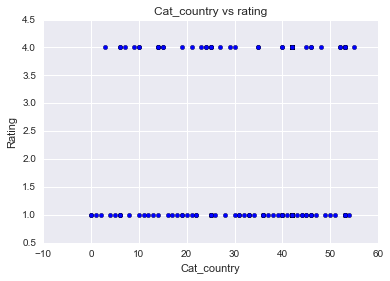

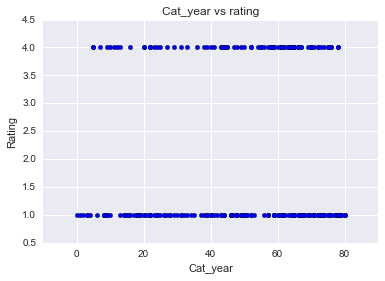

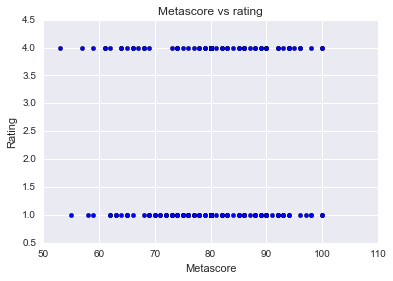

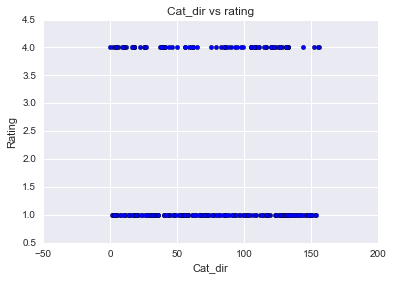

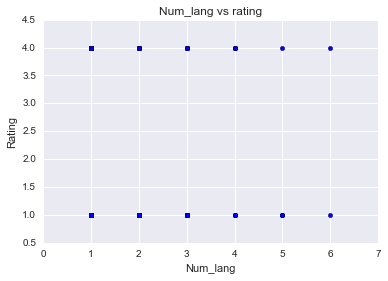

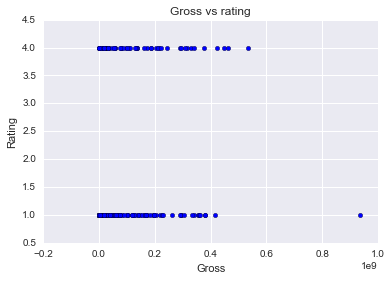

In [874]:
# Visualize the data to see differences in distribution among the four classes of the response variable
cols = ['Cat_country', 'Cat_year', 'Metascore', 'Cat_dir', 'Num_lang', 'Gross']

def plot_stuff(col):
    plt.scatter(X[col], y)
    plt.title(col+' vs rating')
    plt.xlabel(col)
    plt.ylabel('Rating')
    plt.show()

for i in cols:
    plot_stuff(i)

# Selecting 10 best features to use to predict the rating of a movie  
I tried many different numbers of features, but 10 seemed to get me the best reuslts

In [1523]:
X_new = SelectKBest(chi2, k=50).fit_transform(X, y)
X_new.shape

(250, 50)

In [1524]:
# Trying to find the 10 chosen features
kbest = SelectKBest(chi2, k=50).fit(X,y)
support = pd.Series(kbest.get_support())
listy = []
for idx,i in enumerate(support):
    if i == True:
        listy.append(idx)
features = []
for i in listy:
    features.append(X.columns[i])
            

# Scale X

In [1525]:
# Scale X

scaler = StandardScaler()
X_scld = pd.DataFrame(scaler.fit_transform(X_new))
X_scld.columns = features
X_scld.head()

,attempt,away_x,bank,body,brutal,criminal,dead,entire_x,families,fighter,...,trouble,true story,vader,working,wwii,years_x,Cat_dir,Cat_year,Gross,imdbVotes
0,-0.127515,-0.110208,-0.110208,-0.110208,-0.127515,-0.127515,-0.156813,-0.110208,-0.110208,-0.110208,...,-0.110208,-0.110208,-0.110208,-0.110208,-0.110208,6.377042,-0.708082,0.400559,-0.437965,3.842815
1,-0.127515,-0.110208,-0.110208,-0.110208,-0.127515,-0.127515,-0.156813,-0.110208,-0.110208,-0.110208,...,-0.110208,-0.110208,-0.110208,-0.110208,-0.110208,-0.156813,-0.750887,-0.576415,0.442027,2.272085
2,-0.127515,-0.110208,-0.110208,-0.110208,-0.127515,-0.127515,-0.156813,-0.110208,-0.110208,-0.110208,...,-0.110208,-0.110208,-0.110208,-0.110208,-0.110208,-0.156813,-0.750887,-0.487599,-0.198641,1.181996
3,-0.127515,-0.110208,-0.110208,-0.110208,-0.127515,-0.127515,-0.156813,-0.110208,-0.110208,-0.110208,...,-0.110208,-0.110208,-0.110208,-0.110208,-0.110208,-0.156813,-1.200340,1.022270,3.735319,3.809740
4,-0.127515,-0.110208,-0.110208,-0.110208,-0.127515,-0.127515,-0.156813,-0.110208,-0.110208,-0.110208,...,-0.110208,-0.110208,-0.110208,-0.110208,-0.110208,-0.156813,1.153940,-1.198125,-0.531939,0.145901


# Split data into training and testing groups

In [1526]:
# Split my data

X_train, X_test, y_train, y_test = train_test_split(X_scld, y, stratify=y, test_size=0.33, random_state=1)

# Decision Tree Classifier

In [1535]:
# Find best params for decision tree classifier

dtc = DecisionTreeClassifier()
pg = {
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 1, 2, 3],
    'max_depth': [None, 4, 5, 6, 7, 8, 9],
    'max_leaf_nodes': [None, 4, 5, 6, 7, 8, 9]
}

gs = GridSearchCV(dtc, param_grid=pg, cv=5)
gs.fit(X_train, y_train)
print gs.best_params_
print gs.best_score_

{'max_features': 1, 'max_leaf_nodes': None, 'criterion': 'entropy', 'max_depth': None}
0.706586826347


In [1541]:
# Fitting Decision Tree Classifier

dtc = DecisionTreeClassifier(max_features=2, max_leaf_nodes=None, criterion='entropy', max_depth=None)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print 'Accuracy:', dtc.score(X_test, y_test)

con = pd.DataFrame(confusion_matrix(y_test, y_pred))
con.index = ['Low Rating', 'High Rating']
con.columns = ['Predicted Low Rating', 'Prediced High Rating']
print con
print classification_report(y_pred, y_test)

Accuracy: 0.722891566265
             Predicted Low Rating  Prediced High Rating
Low Rating                     25                    14
High Rating                     9                    35
             precision    recall  f1-score   support

          0       0.64      0.74      0.68        34
          1       0.80      0.71      0.75        49

avg / total       0.73      0.72      0.72        83



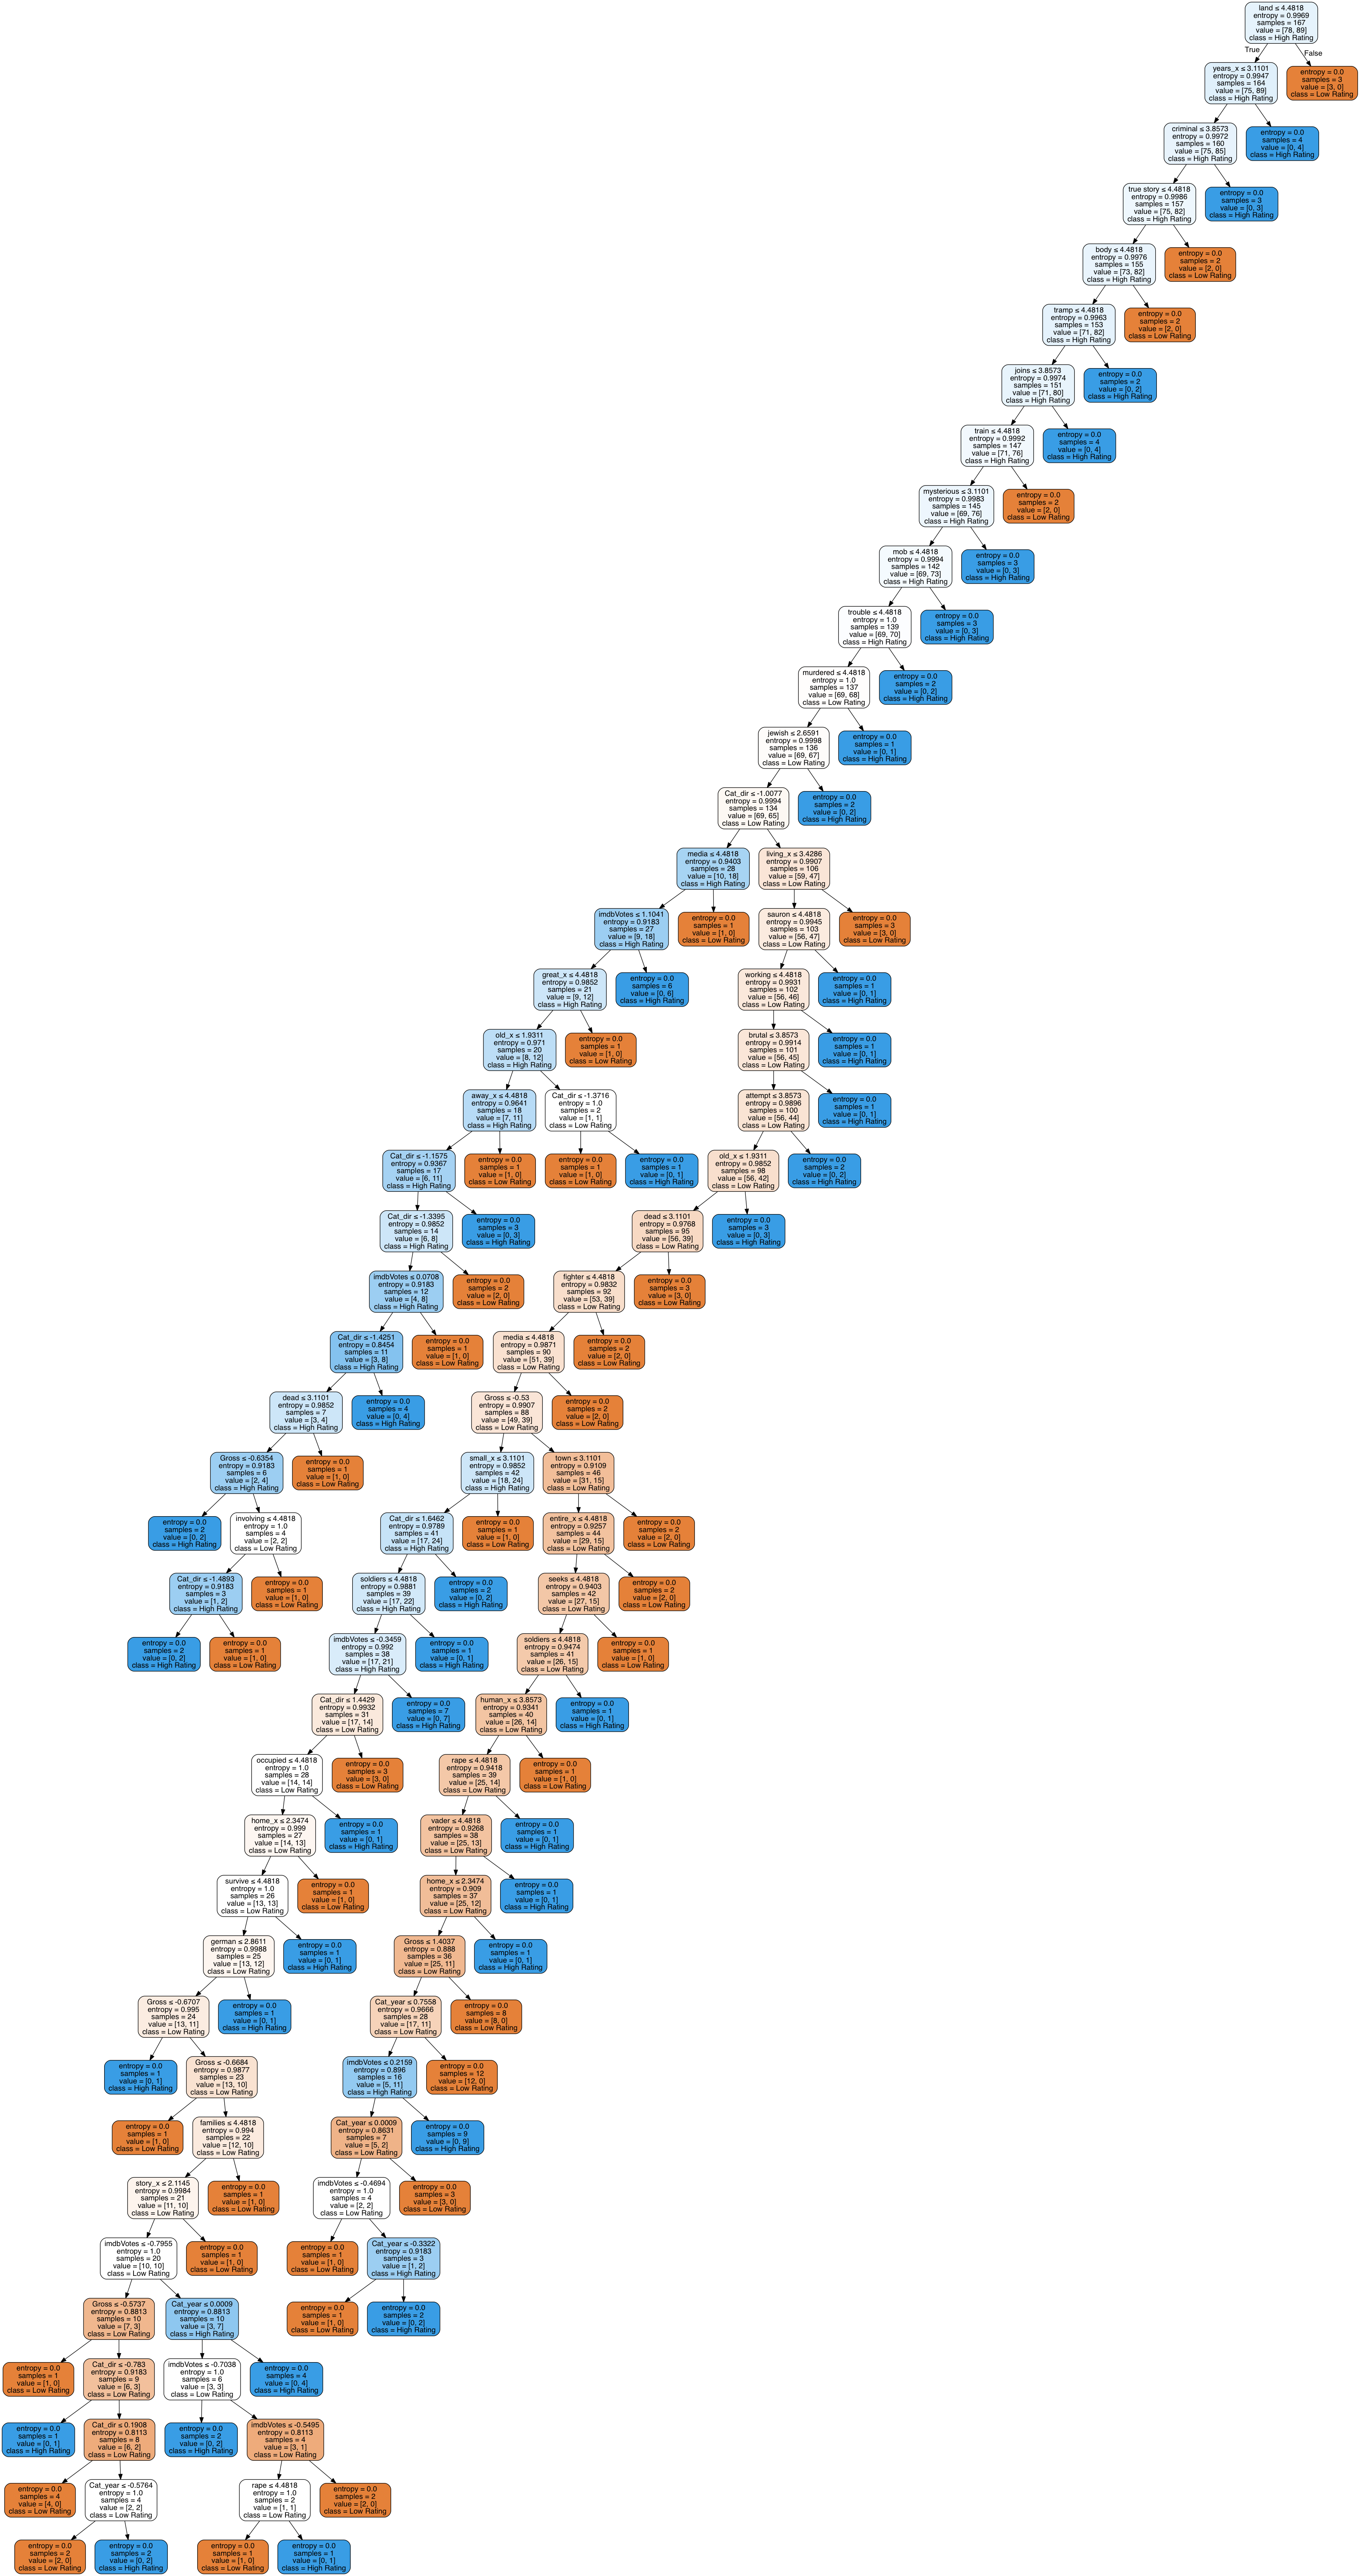

In [1544]:
# Looking at the Dec Tree Classifier

with open("X.dot", 'w') as f:
    f = tree.export_graphviz(dtc, out_file=f)
    

os.unlink('X.dot')


dot_data = tree.export_graphviz(dtc, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("X.pdf") 


dot_data = tree.export_graphviz(dtc, out_file=None, 
                         feature_names=X_scld.columns,  
                         class_names=['Low Rating', 'High Rating'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

AUC score: 0.743881118881


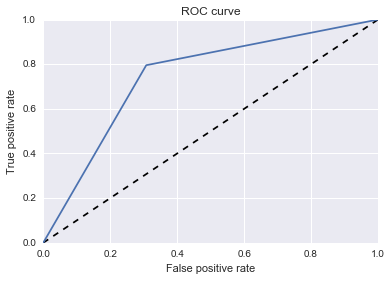

In [1471]:
# Print AUC score and ROC curve
print 'AUC score:', roc_auc_score(y_test,y_pred)
fpr_rt_dtc, tpr_rt_dtc, _ = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_dtc, tpr_rt_dtc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.show()

# Bagging Classifier with dtc

In [1472]:
# Finding best params for Bagging Classifier with decision tree classifier
bc = BaggingClassifier(dtc)

pg = {'n_estimators': [10, 15, 20, 25, 30, 35, 40],
     'bootstrap': [True, False],
     'bootstrap_features': [True, False]
     }

gs = GridSearchCV(bc, param_grid=pg, cv=5)
gs.fit(X_train, y_train)
print gs.best_params_
print gs.best_score_

{'n_estimators': 35, 'bootstrap': False, 'bootstrap_features': True}
0.778443113772


In [1475]:
bc = BaggingClassifier(dtc, n_estimators=35, bootstrap=False, bootstrap_features=True)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
print 'Accuracy:', bc.score(X_test, y_test)

con = pd.DataFrame(confusion_matrix(y_test, y_pred))
con.index = ['Low Rating', 'High Rating']
con.columns = ['Predicted Low Rating', 'Prediced High Rating']
print con
print classification_report(y_pred, y_test)

Accuracy: 0.795180722892
             Predicted Low Rating  Prediced High Rating
Low Rating                     28                    11
High Rating                     6                    38
             precision    recall  f1-score   support

          0       0.72      0.82      0.77        34
          1       0.86      0.78      0.82        49

avg / total       0.80      0.80      0.80        83



AUC score: 0.790792540793


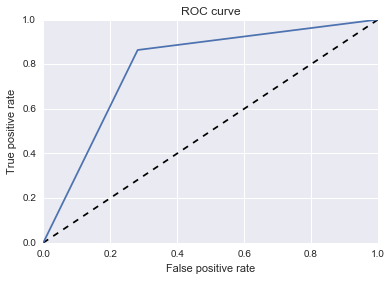

In [1476]:
# Print AUC score and ROC curve
print 'AUC score:', roc_auc_score(y_test,y_pred)
fpr_rt_dtc, tpr_rt_dtc, _ = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_dtc, tpr_rt_dtc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.show()

# Random Forest Classifier

In [1478]:
# Finding best params for Random Forest Classifier

rfc = RandomForestClassifier()
pg = {
    'bootstrap': [True, False],
    'criterion':['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 9, 15]
}
gs = GridSearchCV(rfc, param_grid=pg, cv=5)
gs.fit(X_train, y_train)
print gs.best_params_
print gs.best_score_

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15}
0.74251497006


In [1490]:
# Fitting Random Forest Classifier

rfc = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=15)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print 'Accuracy:', rfc.score(X_test, y_test)

con = pd.DataFrame(confusion_matrix(y_test, y_pred))
con.index = ['Low Rating', 'High Rating']
con.columns = ['Predicted Low Rating', 'Prediced High Rating']
print con
print classification_report(y_pred, y_test)

Accuracy: 0.746987951807
             Predicted Low Rating  Prediced High Rating
Low Rating                     24                    15
High Rating                     6                    38
             precision    recall  f1-score   support

          0       0.62      0.80      0.70        30
          1       0.86      0.72      0.78        53

avg / total       0.77      0.75      0.75        83



AUC score: 0.73951048951


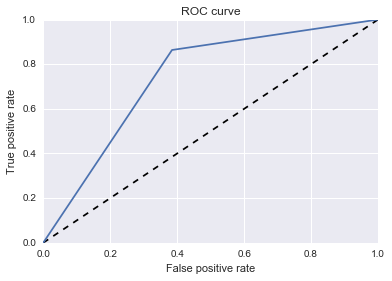

In [1491]:
# Print AUC score and ROC curve
print 'AUC score:', roc_auc_score(y_test,y_pred)
fpr_rt_dtc, tpr_rt_dtc, _ = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_dtc, tpr_rt_dtc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.show()

# Extra Trees Classifier  
This model outperformed all of the rest

In [1492]:
# Finding best params for Extra Trees Classifier

etc = ExtraTreesClassifier()
pg = {
    'bootstrap': [True, False],
    'criterion':['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 9, 15]
}
gs = GridSearchCV(etc, param_grid=pg, cv=5)
gs.fit(X_train, y_train)
print gs.best_params_
print gs.best_score_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None}
0.766467065868


In [1502]:
# Fitting Extra Trees Classifier

etc = ExtraTreesClassifier(bootstrap=True, criterion='gini', max_depth=None)
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
print 'Accuracy:', etc.score(X_test, y_test)

con = pd.DataFrame(confusion_matrix(y_test, y_pred))
con.index = ['Low Rating', 'High Rating']
con.columns = ['Predicted Low Rating', 'Prediced High Rating']
print con
print classification_report(y_pred, y_test)

Accuracy: 0.795180722892
             Predicted Low Rating  Prediced High Rating
Low Rating                     32                     7
High Rating                    10                    34
             precision    recall  f1-score   support

          0       0.82      0.76      0.79        42
          1       0.77      0.83      0.80        41

avg / total       0.80      0.80      0.80        83



AUC score: 0.79662004662


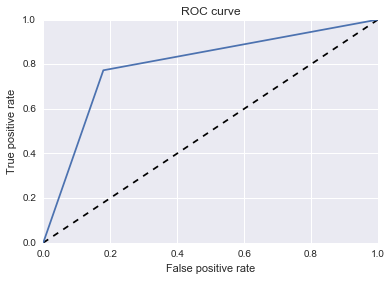

In [1503]:
# Print AUC score and ROC curve

print 'AUC score:', roc_auc_score(y_test,y_pred)
fpr_rt_dtc, tpr_rt_dtc, _ = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_dtc, tpr_rt_dtc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.show()


# Feature Importances Using etc

In [1546]:
feat_imp = pd.DataFrame(etc.feature_importances_)
feat_imp.index = features
print 'The following are the top 5 predictors'
print feat_imp.sort_values(0, axis=0, ascending=False).head()

The following are the top 5 predictors
                  0
Cat_year   0.154981
imdbVotes  0.141221
Cat_dir    0.139295
Gross      0.106856
dead       0.037765
